# Feature extraction: naive methods

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import os
import sys
from copy import deepcopy

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
pd.options.display.max_columns = 100
import umap
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


if __package__ is None:

    module_path = os.path.abspath(os.path.join('..'))
    sys.path.append(module_path)

    __package__ = os.path.basename(module_path)


from synbio_morpher.utils.results.visualisation import hist3d
from explanations.data_enhancing import enhance_data


2023-10-16 14:05:00.901577: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-16 14:05:01.080810: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-16 14:05:01.836422: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/cuda/lib64:/usr/local/cuda/-11.8/lib64:/usr/local/cuda-12/lib64
2023-10-16 

## Process data

In [3]:
# fn = '../data/ensemble_mutation_effect_analysis/2023_04_11_192013/summarise_simulation/tabulated_mutation_info.csv'
# fn = '../data/ensemble_mutation_effect_analysis/2023_05_09_220322/summarise_simulation/tabulated_mutation_info.csv'
fn = '../data/ensemble_mutation_effect_analysis/2023_07_17_105328/summarise_simulation/tabulated_mutation_info.csv'
info = pd.read_csv(fn)

In [4]:
info

circuit_name mutation_name  mutation_num    mutation_type  \
0            toy_mRNA_circuit_0   ref_circuit             0               []   
1            toy_mRNA_circuit_0   ref_circuit             0               []   
2            toy_mRNA_circuit_0   ref_circuit             0               []   
3            toy_mRNA_circuit_0    RNA_0_m1-0             1             [10]   
4            toy_mRNA_circuit_0    RNA_0_m1-0             1             [10]   
...                         ...           ...           ...              ...   
1628995  toy_mRNA_circuit_12699    RNA_2_m5-8             5  [4, 0, 5, 5, 6]   
1628996  toy_mRNA_circuit_12699    RNA_2_m5-8             5  [4, 0, 5, 5, 6]   
1628997  toy_mRNA_circuit_12699    RNA_2_m5-9             5  [6, 3, 6, 5, 0]   
1628998  toy_mRNA_circuit_12699    RNA_2_m5-9             5  [6, 3, 6, 5, 0]   
1628999  toy_mRNA_circuit_12699    RNA_2_m5-9             5  [6, 3, 6, 5, 0]   

        mutation_positions                           path_to_template_circuit  \
0                       []  data/ensemble_mutation_effect_analysis/2023_07...   
1                       []  data/ensemble_mutation_effect_analysis/2023_07...   
2                       []  data/ensemble_mutation_effect_analysis/2023_07...   
3                     [14]  data/ensemble_mutation_effect_analysis/2023_07...   
4                     [14]  data/ensemble_mutation_effect_analysis/2023_07...   
...                    ...                                                ...   
1628995   [8, 4, 13, 2, 6]  data/ensemble_mutation_effect_analysis/2023_07...   
1628996   [8, 4, 13, 2, 6]  data/ensemble_mutation_effect_analysis/2023_07...   
1628997   [0, 7, 3, 2, 18]  data/ensemble_mutation_effect_analysis/2023_07...   
1628998   [0, 7, 3, 2, 18]  data/ensemble_mutation_effect_analysis/2023_07...   
1628999   [0, 7, 3, 2, 18]  data/ensemble_mutation_effect_analysis/2023_07...   

         index                    name interacting self_interacting  \
0          0.0      toy_mRNA_circuit_0     [[0 1]]          [[1 1]]   
1          0.0      toy_mRNA_circuit_0     [[0 1]]          [[1 1]]   
2          0.0      toy_mRNA_circuit_0     [[0 1]]          [[1 1]]   
3          0.0      toy_mRNA_circuit_0     [[0 1]]          [[1 1]]   
4          0.0      toy_mRNA_circuit_0     [[0 1]]          [[1 1]]   
...        ...                     ...         ...              ...   
1628995  158.0  toy_mRNA_circuit_12699          []               []   
1628996  158.0  toy_mRNA_circuit_12699          []               []   
1628997  159.0  toy_mRNA_circuit_12699          []               []   
1628998  159.0  toy_mRNA_circuit_12699          []               []   
1628999  159.0  toy_mRNA_circuit_12699          []               []   

         num_interacting  num_self_interacting binding_sites_0-0  \
0                      1                     1               NaN   
1                      1                     1               NaN   
2                      1                     1               NaN   
3                      1                     1               NaN   
4                      1                     1               NaN   
...                  ...                   ...               ...   
1628995                0                     0               NaN   
1628996                0                     0               NaN   
1628997                0                     0               NaN   
1628998                0                     0               NaN   
1628999                0                     0               NaN   

                                        binding_sites_0-1 binding_sites_0-2  \
0        (3,9):(4,8):(5,7):(6,6):(7,5):(8,4):(9,3):(10,2)               NaN   
1        (3,9):(4,8):(5,7):(6,6):(7,5):(8,4):(9,3):(10,2)               NaN   
2        (3,9):(4,8):(5,7):(6,6):(7,5):(8,4):(9,3):(10,2)               NaN   
3        (3,9):(4,8):(5,7):(6,6):(7,5):(8,4):(9,3):(10,2)               NaN   
4        (3,9):(4,8)

In [5]:
info, infom, info_summ = enhance_data(info) 

KeyboardInterrupt: 

## Features

Convert to Z-scores

In [ ]:
# data = info[(info['sample_name'] == 'RNA_1')].dropna(axis=1)
# numerical_cols = 
# data = data[np.abs(data[numerical_cols]) < 1e11]
d = info[(info['sample_name'] != 'RNA_0')][['sensitivity', 'precision']]
d = d[(d['sensitivity'] < 1e11) & (d['precision'] < 1e11)]
scaled_data_sp = StandardScaler().fit_transform(d)

Grouped

In [ ]:
infom[(infom['idx'] != 'energies_1-0') & (infom['idx'] != 'energies_2-0') & (infom['idx'] != 'energies_2-1')].pivot_table('binding_rates_dissociation', ['idx'], ['circuit_name', 'mutation_name'])


circuit_name  toy_mRNA_circuit_0                                      \
mutation_name         RNA_0_m1-0  RNA_0_m1-1  RNA_0_m1-2  RNA_0_m1-3   
idx                                                                    
energies_0-0          899.999500  899.999500  899.999500  899.999500   
energies_0-1            8.485800    1.581532    2.515305   20.295399   
energies_0-2          899.999500  899.999500  899.999500  899.999500   
energies_1-1            0.287767    0.287767    0.287767    0.287767   
energies_1-2          899.999500  899.999500  899.999500  899.999500   
energies_2-2          899.999500  899.999500  899.999500  899.999500   

circuit_name                                                               \
mutation_name  RNA_0_m1-4  RNA_0_m1-5  RNA_0_m1-6  RNA_0_m1-7  RNA_0_m1-8   
idx                                                                         
energies_0-0   899.999500  899.999500  899.999500  899.999500  899.999500   
energies_0-1   899.999500    4.097570    1.581532    0.896187  899.999500   
energies_0-2   899.999500  899.999500  899.999500  899.999500  899.999500   
energies_1-1     0.287767    0.287767    0.287767    0.287767    0.287767   
energies_1-2   899.999500  899.999500  899.999500  899.999500  899.999500   
energies_2-2   899.999500  899.999500  899.999500  899.999500  899.999500   

circuit_name                                                               \
mutation_name  RNA_0_m1-9 RNA_0_m10-0 RNA_0_m10-1 RNA_0_m10-2 RNA_0_m10-3   
idx                                                                         
energies_0-0   899.999500  899.999500  899.999500  899.999500  899.999500   
energies_0-1   899.999500  899.999500  899.999500  899.999500  899.999500   
energies_0-2     3.096877  899.999500  899.999500  899.999500  899.999500   
energies_1-1     0.287767    0.287767    0.287767    0.287767    0.287767   
energies_1-2   899.999500  899.999500  899.999500  899.999500  899.999500   
energies_2-2   899.999500  899.999500  899.999500  899.999500  899.999500   

circuit_name                                                               \
mutation_name RNA_0_m10-4 RNA_0_m10-5 RNA_0_m10-6 RNA_0_m10-7 RNA_0_m10-8   
idx                                                                         
energies_0-0   899.999500    2.126323    0.004491  899.999500  899.999500   
energies_0-1   899.999500  899.999500  899.999500  899.999500  899.999500   
energies_0-2   899.999500  899.999500  899.999500  899.999500  899.999500   
energies_1-1     0.287767    0.287767    0.287767    0.287767    0.287767   
energies_1-2   899.999500  899.999500  899.999500  899.999500  899.999500   
energies_2-2   899.999500  899.999500  899.999500  899.999500  899.999500   

circuit_name                                                               \
mutation_name RNA_0_m10-9 RNA_0_m15-0 RNA_0_m15-1 RNA_0_m15-2 RNA_0_m15-3   
idx                                                                         
energies_0-0    32.278267  899.999500  653.533750  899.999500  899.999500   
energies_0-1   899.999500  899.999500  899.999500  899.999500  899.999500   
energies_0-2   899.999500  899.999500  899.999500  899.999500  899.999500   
energies_1-1     0.287767    0.287767    0.287767    0.287767    0.287767   
energies_1-2   899.999500  899.999500  899.999500  899.999500  899.999500   
energies_2-2   899.999500  899.999500  899.999500  899.999500  899.999500   

circuit_name                                                               \
mutation_name RNA_0_m15-4 RNA_0_m15-5 RNA_0_m15-6 RNA_0_m15-7 RNA_0_m15-8   
idx                                                                         
energies_0-0   899.999500    0.100098  899.999500  899.999500  899.999500   
energies_0-1   899.999500  899.999500  899.999500  899.999500  899.999500   
energies_0-2   899.999500  899.999500  899.999500  899.999500  899.999500   
energies_1-1     0.287767    0.287767    0.287767    0.287767    0.287767   
energies_1-2   899.999500  899.99950

In [ ]:
# grp_mutations = infom.pivot_table('binding_rates_dissociation', ['sample_name', 'mutation_name', 'idx'], 'circuit_name').T.to_numpy()
grp_mutations = infom[(infom['idx'] != 'energies_1-0') & (infom['idx'] != 'energies_2-0') & (infom['idx'] != 'energies_2-1')].pivot_table('binding_rates_dissociation', ['idx'], ['circuit_name', 'mutation_name']).T.to_numpy()
scaled_data = StandardScaler().fit_transform(grp_mutations)


In [ ]:
grp_mutations.shape

(543000, 6)

## UMAP

In [ ]:
# fig = px.scatter_3d(
#     mutation_log,
#     x=embedding[:, 0], y=embedding[:, 1], z='sp_distance', 
#     color=[sns.color_palette()[x] for x in info['sample_name'].map({"RNA_0":0, "RNA_1":1, "RNA_2":2})])
# fig.show()

# fig = hist3d(data=None, x=embedding[:, 0], y=embedding[:, 1])
# fig.show()

In [ ]:
# digits_df = pd.DataFrame(digits.data[:,1:11])
# digits_df['digit'] = pd.Series(digits.target).map(lambda x: 'Digit {}'.format(x))
# sns.pairplot(digits_df, hue='digit', palette='Spectral');

## TSNE

### TSNE on precision vs. sensitivity

In [ ]:
# tsne = TSNE(n_components=2, random_state=0)
# projections = tsne.fit_transform(d)

In [ ]:
# data['projection_0'] = projections[:, 0]
# data['projection_1'] = projections[:, 1]

In [ ]:

# fig = px.scatter(
#     data, x='projection_0', y='projection_1',
#     color='num_interacting_all', labels={'color': 'num_interacting_all'},
#     hover_name="circuit_name"
# )
# fig.show()

### Multi-value per circuit

In [ ]:
projections_g = np.array([])
for seed in [0]:
    tsne = TSNE(n_components=2, random_state=seed)
    p = tsne.fit_transform(grp_mutations)
    if len(projections_g):
        projections_g = np.concatenate([projections_g, p])
    else:
        projections_g = p

Visualise

In [ ]:
def visualise_embedding(embedding_matrix, i=0, j=1, algorithm='T-SNE'):
    for h in ['mutation_num', 'frac_muts_in_binding_site', 'num_interacting_all', 'num_interacting', 'num_self_interacting', 'sensitivity', 'precision', 'RMSE', 'fold_change', 'overshoot', 'energies', 'binding_rates_dissociation', 'eqconstants']:
        hue = [
            infom.groupby(['circuit_name', 'mutation_name']).agg({h: 'mean'}).to_numpy().squeeze(),
            infom.groupby(['circuit_name', 'mutation_name']).agg({h: 'std'}).to_numpy().squeeze(),
            infom.groupby(['circuit_name', 'mutation_name']).agg({h: lambda x: np.std(x) / np.where(np.mean(x) != 0, np.mean(x), 1)}).to_numpy().squeeze()
        ]
        # if h in ['sensitivity', 'precision']:
        #     hue = [np.log(x) for x in hue]

        plt.figure(figsize=(28, 8))
        ax = plt.subplot(1,3,1)
        sns.scatterplot(
            x=embedding_matrix[:, i],
            y=embedding_matrix[:, j],
            hue=hue[0]
        )
        plt.legend(title=h + '_mean')
        plt.ylabel(f'{algorithm} {j}')
        ax = plt.subplot(1,3,2)
        sns.scatterplot(
            x=embedding_matrix[:, i],
            y=embedding_matrix[:, j],
            hue=hue[1]
        )
        plt.xlabel(f'{algorithm} {i}')
        plt.legend(title=h + '_std')
        ax = plt.subplot(1,3,3)
        sns.scatterplot(
            x=embedding_matrix[:, i],
            y=embedding_matrix[:, j],
            hue=hue[2]
        )
        plt.legend(title=h + '_std_normed_by_mean')
        plt.gca().set_aspect('equal', 'datalim')
        

In [ ]:
# projections_g_mean = projections_g.reshape((5, grp_mutations.shape[0], 2)).mean(axis=0)
projections_g_mean = projections_g
visualise_embedding(projections_g_mean)

## PCA

In [ ]:
pca = PCA(n_components=3)
pca_embedding = pca.fit_transform(grp_mutations)

In [ ]:

h = 'num_interacting_all'
fig = px.scatter(
    info[info['sample_name'] == 'RNA_0'], x=pca_embedding[:, 0], y=pca_embedding[:, 2],
    color=infom.groupby(['circuit_name', 'mutation_name']).agg({h: 'mean'}).to_numpy().squeeze(), 
    labels={'color': h},
    hover_name="circuit_name",
    hover_data=['interacting', 'self_interacting']
)
fig.show()

In [ ]:
# visualise_embedding(pca_embedding, i=0, j = 2, algorithm='PCA')


In [ ]:
h = 'binding_rates_dissociation'
# h = 'sensitivity'
embedding_matrix = pca_embedding
algorithm = 'PCA'
# for i in np.arange(1, 6):
#     for j in np.arange(i, 6):
i = 0
j = 2
hue = [
    infom.groupby(['circuit_name', 'mutation_name']).agg({h: 'mean'}).to_numpy().squeeze(),
    # infom.groupby(['circuit_name', 'mutation_name']).agg({h: 'std'}).to_numpy().squeeze(),
    # infom.groupby(['circuit_name', 'mutation_name']).agg({h: lambda x: np.std(x) / np.where(np.mean(x) != 0, np.mean(x), 1)}).to_numpy().squeeze()
]
# if h in ['sensitivity', 'precision']:
#     hue = [np.log(x) for x in hue]

plt.figure(figsize=(28, 8))
ax = plt.subplot(1,3,1)
sns.scatterplot(
    x=embedding_matrix[:, i],
    y=embedding_matrix[:, j],
    hue=hue[0]
)
plt.legend(title=h + '_mean')
plt.ylabel(f'{algorithm} {j}')
# ax = plt.subplot(1,3,2)
# sns.scatterplot(
#     x=embedding_matrix[:, i],
#     y=embedding_matrix[:, j],
#     hue=hue[1]
# )
plt.xlabel(f'{algorithm} {i}')
# plt.legend(title=h + '_std')
# ax = plt.subplot(1,3,3)
# sns.scatterplot(
#     x=embedding_matrix[:, i],
#     y=embedding_matrix[:, j],
#     hue=hue[2]
# )
# plt.legend(title=h + '_std_normed_by_mean')
plt.gca().set_aspect('equal', 'datalim')

In [ ]:
pca.explained_variance_ratio_

array([0.21343336, 0.20332475, 0.20051519])

## Quick binding energy examination

In [ ]:
ii = 1
n_species = len(info['sample_name'].unique())
fig = plt.figure(figsize=(30, 30))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(n_species):
    for j in range(i, n_species):
        if i == 0 and (j == 0):
            continue
        ax = plt.subplot(n_species, n_species, ii)
        sns.scatterplot(info.sort_values(by='sensitivity'), x=f'binding_rates_dissociation_{i}-{j}', y='binding_rates_dissociation_0-0', 
                        hue=np.log(info['sensitivity']), alpha=0.1, palette='viridis_r')
        sns.move_legend(ax, 'upper left', bbox_to_anchor=(1, 1))
        ii += 1
# sns.scatterplot(info, x='binding_rates_dissociation_1-1', y='binding_rates_dissociation_0-1', hue='sensitivity')

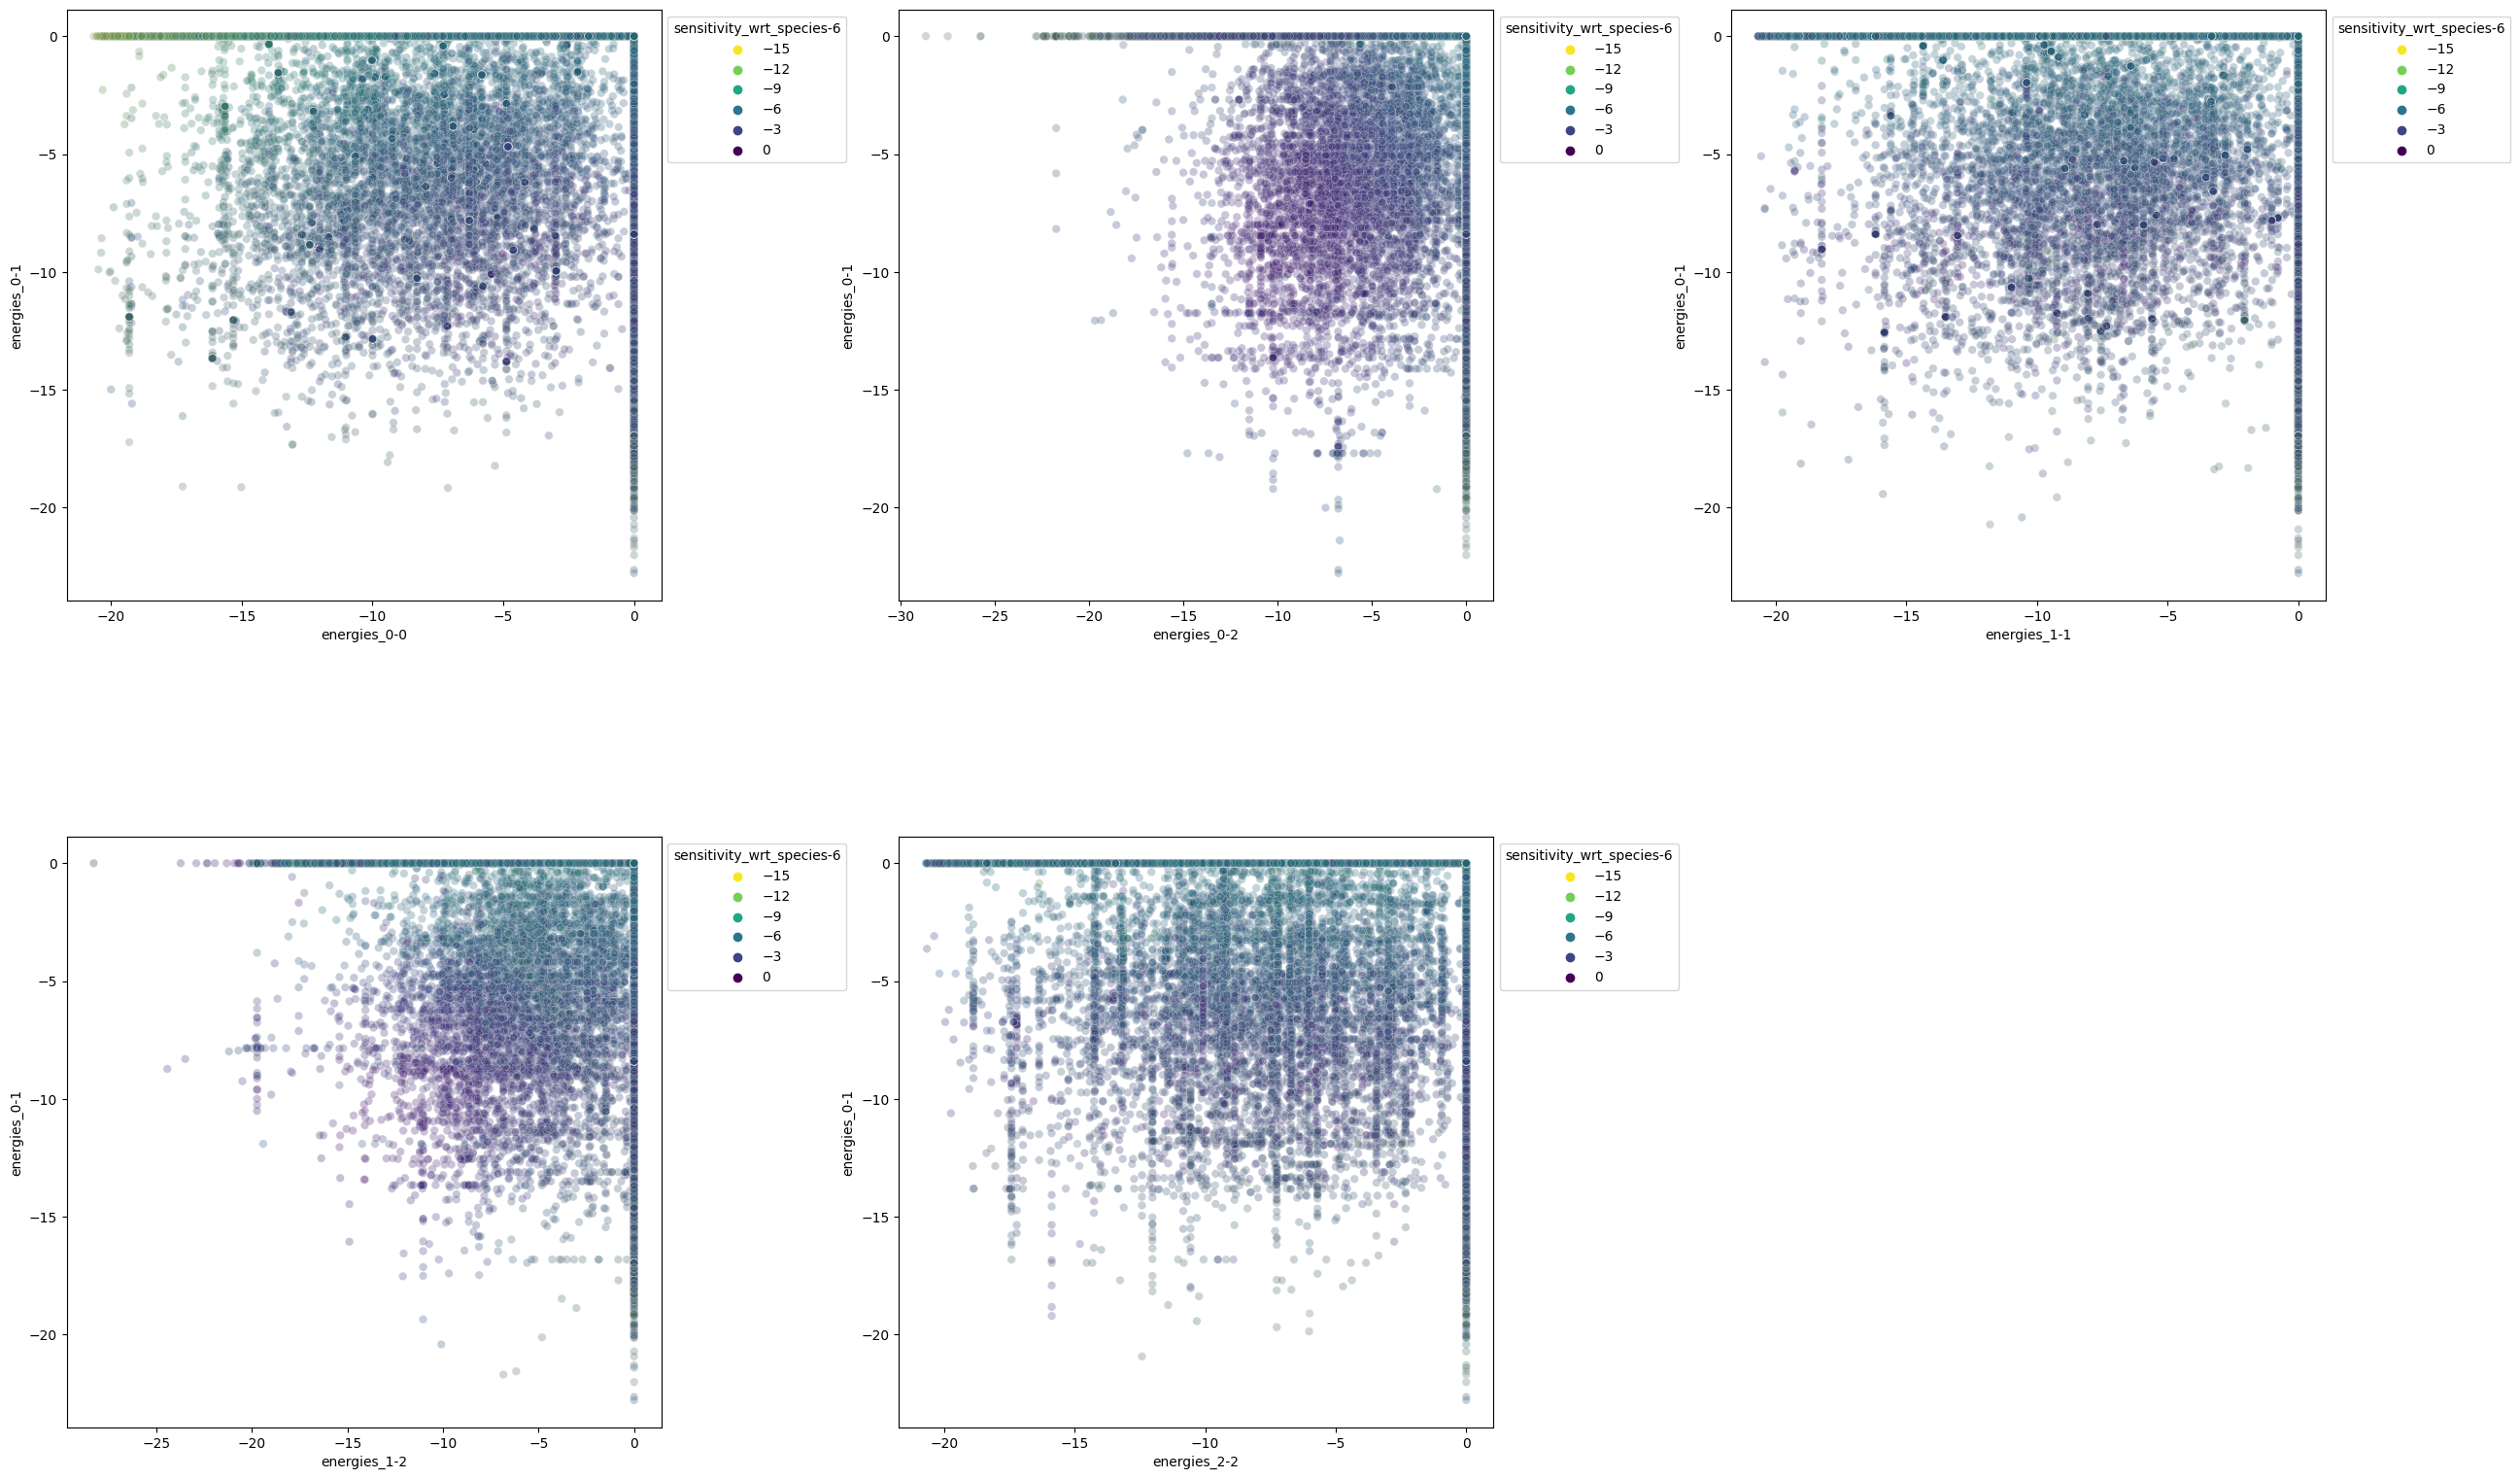

In [ ]:
ii = 1
n_species = len(info['sample_name'].unique())
fig = plt.figure(figsize=(30, 30))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(n_species):
    for j in range(i, n_species):
        if i == 0 and (j == 1):
            continue
        ax = plt.subplot(n_species, n_species, ii)
        sns.scatterplot(info.sort_values(by='sensitivity'), x=f'energies_{i}-{j}', y='energies_0-1', hue=np.log(info['sensitivity']), alpha=0.1, palette='viridis_r')
        sns.move_legend(ax, 'upper left', bbox_to_anchor=(1, 1))
        ii += 1
# sns.scatterplot(info, x='energies_1-1', y='energies_0-1', hue='sensitivity')

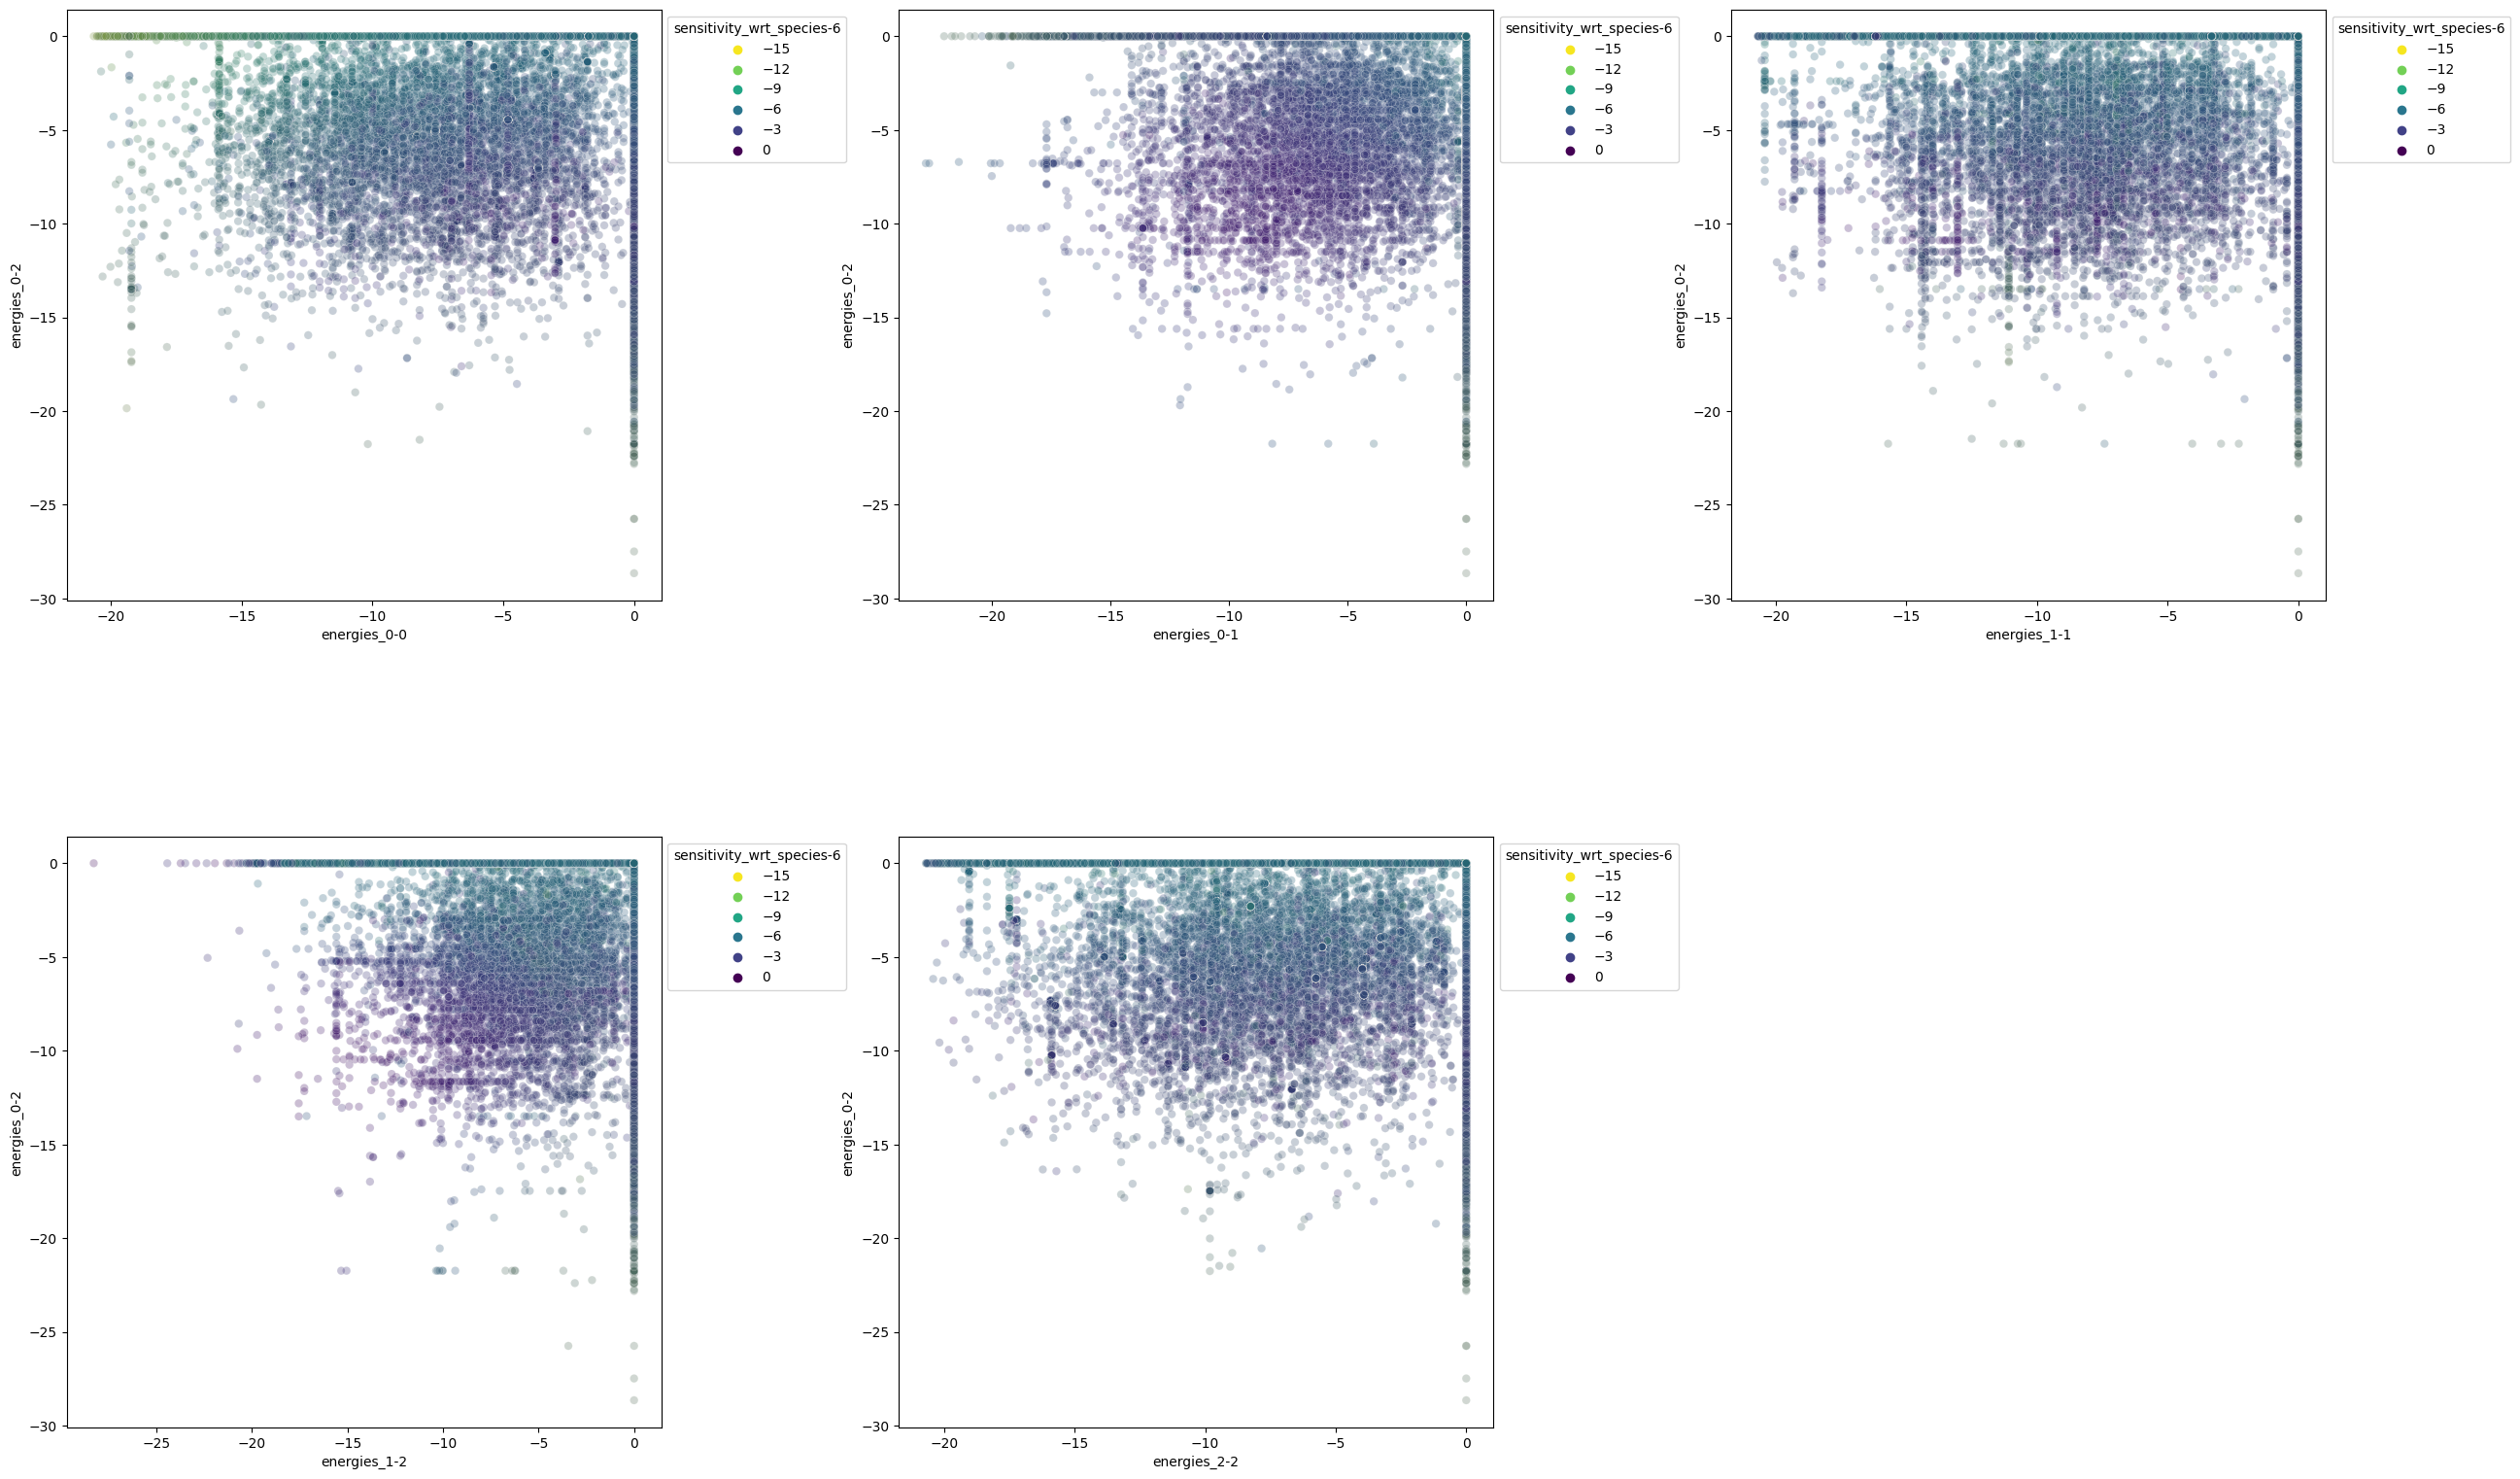

In [ ]:
ii = 1
n_species = len(info['sample_name'].unique())
fig = plt.figure(figsize=(30, 30))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(n_species):
    for j in range(i, n_species):
        if i == 0 and (j == 2):
            continue
        ax = plt.subplot(n_species, n_species, ii)
        sns.scatterplot(info.sort_values(by='sensitivity'), x=f'energies_{i}-{j}', y='energies_0-2', hue=np.log(info['sensitivity']), alpha=0.1, palette='viridis_r')
        sns.move_legend(ax, 'upper left', bbox_to_anchor=(1, 1))
        ii += 1
# sns.scatterplot(info, x='energies_1-1', y='energies_0-1', hue='sensitivity')

<AxesSubplot: xlabel='sensitivity', ylabel='Count'>

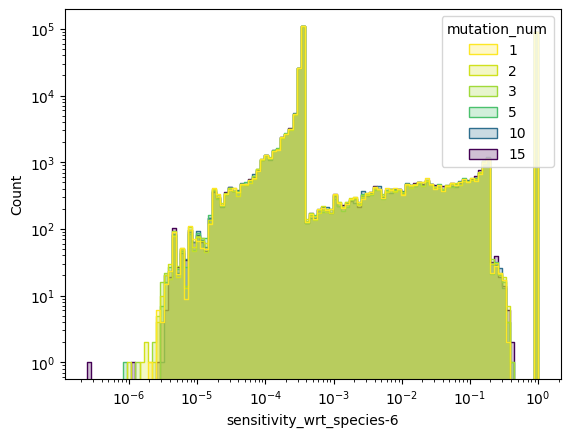

In [ ]:
sns.histplot(info[info['mutation_num'] != 0], x='sensitivity_ratio_from_mutation_to_base', hue='mutation_num', element='step', log_scale=[True, True], palette='viridis_r')